<a href="https://colab.research.google.com/github/MansiButola1234/Election-result-prediction/blob/main/ELECTION_RESSULT_PREDICTIONd3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
%matplotlib inline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
!pip install vaderSentiment
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
# Vader sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # for polarity score
analyser = SentimentIntensityAnalyzer()

"""
   following functions returns positive, negative, neutral emotion score of the text respectively.
    """;
def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']


ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
import pandas as pd

df=pd.read_csv('/content/LokSabha_Election_2024_Tweets.csv',index_col=0)
df.head(5)

,text,date,No_of_likes,No_of_comments
link,,,,
https://twitter.com/Politics_2022_/status/1739255975717302352#m,South India 2024 Loksabha Opinion Poll 132 sea...,"Dec 25, 2023 · 12:05 PM UTC",324,27
https://twitter.com/LokmatTimes_ngp/status/1739269955919675902#m,"Veteran actor Nana Patekar says, ""There is no ...","Dec 25, 2023 · 1:00 PM UTC",0,0
https://twitter.com/Politics_2022_/status/1739259977041367194#m,South India BJP 2019 Loksabha Karnataka 25 Tel...,"Dec 25, 2023 · 12:21 PM UTC",142,18
https://twitter.com/rohanayak/status/1739269942212714747#m,Issh baar 357 seats in Loksabha election.,"Dec 25, 2023 · 1:00 PM UTC",0,0
https://twitter.com/BellamSwathi/status/1739199260376347049#m,Total number of times MMS won his own lok sabh...,"Dec 25, 2023 · 8:19 AM UTC",589,80


In [ ]:
# Assuming 'df' is your main dataset with columns ['link', 'text', 'date', 'No_of_likes', 'No_of_comments']

# Filter only the 'date' and 'text' (tweet content) columns
filtered_df = df[['date', 'text']]

# Rename 'text' column to 'tweet' for clarity
filtered_df.rename(columns={'text': 'tweet'}, inplace=True)

# Display the filtered dataset
print(filtered_df)

# Save the filtered dataset to a new CSV (optional)
filtered_df.to_csv('/content/filtered_dataset.csv', index=False)


                                                                           date  \
link                                                                              
https://twitter.com/Politics_2022_/status/17392...  Dec 25, 2023 · 12:05 PM UTC   
https://twitter.com/LokmatTimes_ngp/status/1739...   Dec 25, 2023 · 1:00 PM UTC   
https://twitter.com/Politics_2022_/status/17392...  Dec 25, 2023 · 12:21 PM UTC   
https://twitter.com/rohanayak/status/1739269942...   Dec 25, 2023 · 1:00 PM UTC   
https://twitter.com/BellamSwathi/status/1739199...   Dec 25, 2023 · 8:19 AM UTC   
...                                                                         ...   
https://twitter.com/navaneethreddym/status/1739...   Dec 25, 2023 · 3:03 AM UTC   
https://twitter.com/amitdubey1236/status/173911...   Dec 25, 2023 · 3:03 AM UTC   
https://twitter.com/hm5566859611444/status/1739...   Dec 25, 2023 · 3:01 AM UTC   
https://twitter.com/imvivekmahaR/status/1739119...   Dec 25, 2023 · 3:00 AM UTC   
http

In [ ]:
import pandas as pd

# Keywords related to Modi
modi_keywords = ["Modi", "PM", "modi", "#PMModi", "modi ji", "narendra modi", "@narendramodi", "#Vote4Modi","BJP","bjp","NDA","NaMo APP"]

# Function to check if a tweet contains any Modi-related keyword
def is_modi(tweet):
    # Normalize the tweet to lowercase for case-insensitive matching
    tweet = tweet.lower()
    # Check if any keyword exists in the tweet
    return any(keyword.lower() in tweet for keyword in modi_keywords)

# Load the DataFrame
df = pd.read_csv('/content/filtered_dataset.csv')  # Adjust path as needed

# Filter rows mentioning Modi
df['is_modi'] = df['tweet'].astype(str).apply(is_modi)  # Add a helper column for filtering
modi_df = df[df['is_modi']][['date', 'tweet']]  # Filter and retain only necessary columns

# Display the resulting DataFrame
print(modi_df)


                            date  \
0    Dec 25, 2023 · 12:05 PM UTC   
1     Dec 25, 2023 · 1:00 PM UTC   
2    Dec 25, 2023 · 12:21 PM UTC   
4     Dec 25, 2023 · 8:19 AM UTC   
5    Dec 25, 2023 · 10:00 AM UTC   
..                           ...   
988   Dec 25, 2023 · 3:09 AM UTC   
989   Dec 25, 2023 · 3:09 AM UTC   
994   Dec 19, 2023 · 4:07 PM UTC   
996   Dec 25, 2023 · 3:03 AM UTC   
998   Dec 25, 2023 · 3:00 AM UTC   

                                                 tweet  
0    South India 2024 Loksabha Opinion Poll 132 sea...  
1    Veteran actor Nana Patekar says, "There is no ...  
2    South India BJP 2019 Loksabha Karnataka 25 Tel...  
4    Total number of times MMS won his own lok sabh...  
5    Let’s deliver Tenkasi Lok Sabha seat to streng...  
..                                                 ...  
988  Modi ji ko kya ho gya aaj , santa claus lgta h...  
989  This is again a wrong prediction, NDA is set t...  
994  🚨No🚨 Who loves Indian army 🇮🇳 never pass witho...

In [ ]:
import pandas as pd

# Keywords related to Modi
rahul = ["rahul", "Rahul","RahulGandhi", "gandhi","@RahulGandhi","Gandhi",
         "#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi"]

# Function to check if a tweet contains any Modi-related keyword
def is_rahul(tweet):
    # Normalize the tweet to lowercase for case-insensitive matching
    tweet = tweet.lower()
    # Check if any keyword exists in the tweet
    # Corrected: Use 'rahul' instead of 'rahul_keywords'
    return any(keyword.lower() in tweet for keyword in rahul)

# Load the DataFrame
df = pd.read_csv('/content/filtered_dataset.csv')  # Adjust path as needed

# Filter rows mentioning Modi
df['is_rahul'] = df['tweet'].astype(str).apply(is_rahul)  # Add a helper column for filtering
rahul_df = df[df['is_rahul']][['date', 'tweet']]  # Filter and retain only necessary columns

# Display the resulting DataFrame
print(rahul_df)

                            date  \
47    Dec 25, 2023 · 9:03 AM UTC   
59   Dec 25, 2023 · 12:45 PM UTC   
62   Dec 25, 2023 · 12:45 PM UTC   
63    Dec 24, 2023 · 3:59 PM UTC   
68    Dec 25, 2023 · 1:32 AM UTC   
109   Dec 25, 2023 · 8:38 AM UTC   
149  Dec 25, 2023 · 12:03 PM UTC   
153  Dec 25, 2023 · 12:01 PM UTC   
167   Dec 25, 2023 · 6:42 AM UTC   
169   Dec 25, 2023 · 2:45 AM UTC   
172  Dec 25, 2023 · 10:22 AM UTC   
179  Dec 24, 2023 · 12:45 PM UTC   
186  Dec 25, 2023 · 11:41 AM UTC   
201   Dec 19, 2023 · 6:22 PM UTC   
206  Dec 23, 2023 · 12:24 PM UTC   
209  Dec 25, 2023 · 11:25 AM UTC   
279  Dec 25, 2023 · 10:47 AM UTC   
296    Oct 5, 2023 · 8:38 AM UTC   
305  Dec 25, 2023 · 10:31 AM UTC   
317  Dec 21, 2023 · 10:56 AM UTC   
318   Dec 24, 2023 · 2:32 PM UTC   
333  Dec 25, 2023 · 10:12 AM UTC   
362   Dec 25, 2023 · 9:53 AM UTC   
366   Dec 25, 2023 · 9:51 AM UTC   
423   Dec 16, 2023 · 7:35 AM UTC   
441   Dec 25, 2023 · 9:15 AM UTC   
449   Dec 23, 2023 · 8:27 AM

In [ ]:
from sklearn.feature_extraction import text
import string
stop = text.ENGLISH_STOP_WORDS

"""
 Removing stopwords (as in sklearn library) from tweets so as to get good polarity scores
    """;
modi_df['tweet'] = modi_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
rahul_df['tweet'] = rahul_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

"""
 Removing panctuations from tweets
    """;
modi_df['tweet'] = modi_df['tweet'].apply(remove_punctuations)
rahul_df['tweet'] = rahul_df['tweet'].apply(remove_punctuations)

for modi dataframe


using vader for modi

In [ ]:
from textblob import TextBlob # Import TextBlob to use its sentiment analysis functions

"""
Calculating the polarity scores with help of code snippets mentioned at the importing libraries section
""";
modi_df['pos'] = modi_df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity if x else 0) # Use TextBlob to get polarity scores; handle empty strings
modi_df['neg'] = modi_df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity if x else 0) # Use TextBlob to get subjectivity as a proxy for negative sentiment; handle empty strings
modi_df['neu'] = modi_df['tweet'].apply(lambda x: 1 - (TextBlob(x).sentiment.polarity + TextBlob(x).sentiment.subjectivity) if x else 1) # Calculate neutrality as 1 - (polarity + subjectivity); handle empty strings

In [ ]:
emotion=[]
# Iterate over the rows of the DataFrame using iterrows()
for index, row in modi_df.iterrows():
    emotion.append(max(row['pos'], row['neu'], row['neg']))

modi_df['FinalEmotion'] = emotion

for index, row in modi_df.iterrows():
    if row['FinalEmotion'] == row['pos']:
        modi_df.loc[index, 'FinalEmotion'] = 'positive'
    elif row['FinalEmotion'] == row['neg']:
        modi_df.loc[index, 'FinalEmotion'] = 'negative'
    elif row['FinalEmotion'] == row['neu']:
        modi_df.loc[index, 'FinalEmotion'] = 'neutral'

modi_df

<ipython-input-10-98cb0413110a>:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'positive' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,date,tweet,pos,neg,neu,FinalEmotion
0,"Dec 25, 2023 · 12:05 PM UTC",South India 2024 Loksabha Opinion Poll 132 sea...,0.800000,0.400000,-0.200000,positive
1,"Dec 25, 2023 · 1:00 PM UTC",Veteran actor Nana Patekar says There alternat...,0.311111,0.569444,0.119444,negative
2,"Dec 25, 2023 · 12:21 PM UTC",South India BJP 2019 Loksabha Karnataka 25 Tel...,-0.300000,0.535417,0.764583,neutral
4,"Dec 25, 2023 · 8:19 AM UTC",Total number times MMS won lok sabha seat ZER...,0.025000,0.625000,0.350000,negative
5,"Dec 25, 2023 · 10:00 AM UTC",Let’s deliver Tenkasi Lok Sabha seat strengthe...,0.000000,0.000000,1.000000,neutral
...,...,...,...,...,...,...
988,"Dec 25, 2023 · 3:09 AM UTC",Modi ji ko kya ho gya aaj santa claus lgta ha...,0.000000,0.000000,1.000000,neutral
989,"Dec 25, 2023 · 3:09 AM UTC",This wrong prediction NDA set win 80 lok sabha...,0.300000,0.540000,0.160000,negative
994,"Dec 19, 2023 · 4:07 PM UTC",🚨No🚨 Who loves Indian army 🇮🇳 pass liking post...,0.000000,0.000000,1.000000,neutral
996,"Dec 25, 2023 · 3:03 AM UTC",This ll reverse TMC facing huge antiincumbancy...,0.300000,0.575000,0.125000,negative


In [ ]:
modi_df['FinalEmotion'].value_counts()

,count
FinalEmotion,
neutral,315
negative,108
positive,20


<ipython-input-12-a9a9355a9466>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-12-a9a9355a9466>:6: UserWarning:


The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.



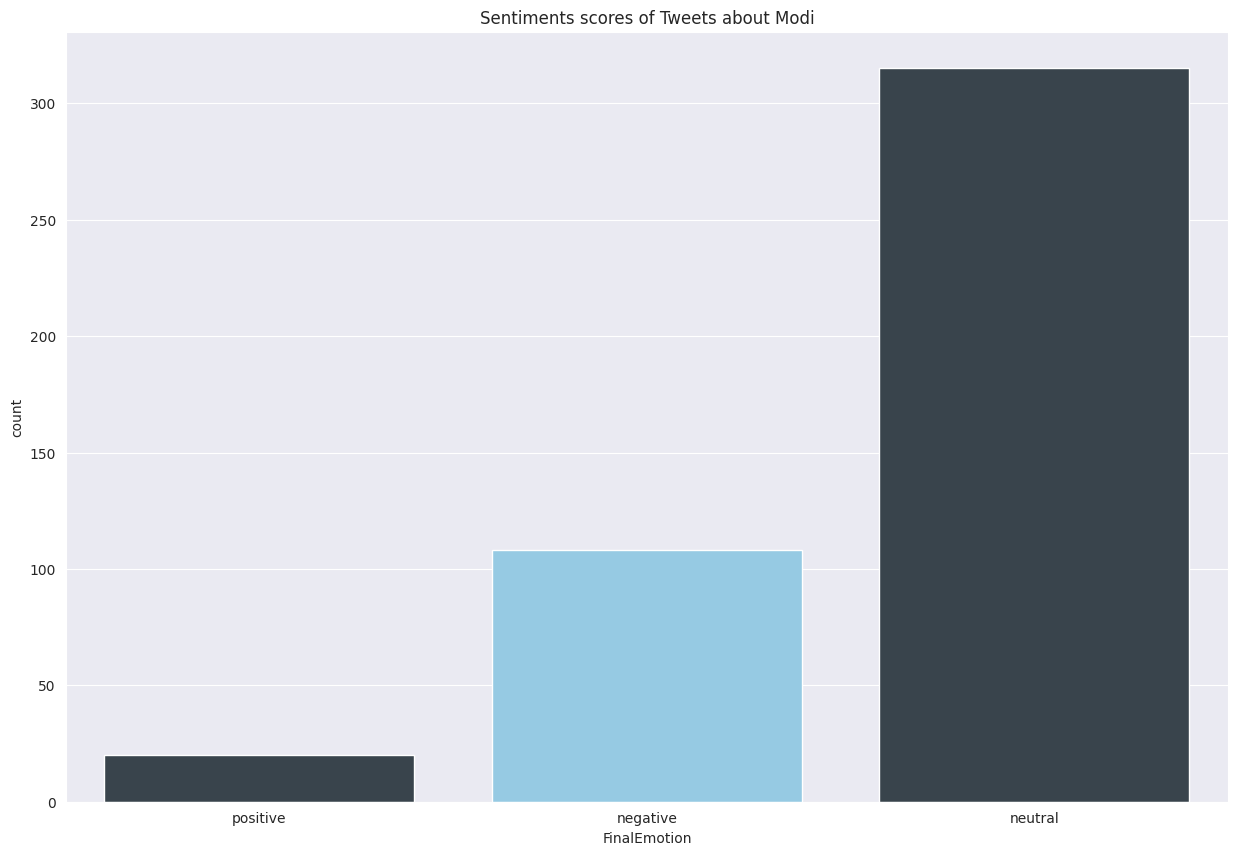

In [ ]:
# Plot visualizing the counts of emotions of all the tweets
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')
plt.show()

using bert

In [ ]:
from textblob import TextBlob

def sentiment_score(text):
  """
  Calculates the sentiment score of a text using TextBlob.

  Args:
      text: The input text.

  Returns:
      An integer representing the sentiment score:
          5 for positive sentiment
          1 for negative sentiment
          3 for neutral sentiment
  """
  analysis = TextBlob(text)
  if analysis.sentiment.polarity > 0:
    return 5  # Positive
  elif analysis.sentiment.polarity < 0:
    return 1  # Negative
  else:
    return 3  # Neutral

modi_df['FinalEmotion'] = modi_df['tweet'].apply(lambda x: sentiment_score(x))
modi_df['FinalEmotion']=modi_df['FinalEmotion'].apply(lambda x : 'Pos' if x==5 else ('Neg' if x==1 else 'Neu'))
modi_df

,date,tweet,pos,neg,neu,FinalEmotion,User
0,"Dec 25, 2023 · 12:05 PM UTC",South India 2024 Loksabha Opinion Poll 132 sea...,0.800000,0.400000,-0.200000,Pos,Narendra Modi
1,"Dec 25, 2023 · 1:00 PM UTC",Veteran actor Nana Patekar says There alternat...,0.311111,0.569444,0.119444,Pos,Narendra Modi
2,"Dec 25, 2023 · 12:21 PM UTC",South India BJP 2019 Loksabha Karnataka 25 Tel...,-0.300000,0.535417,0.764583,Neg,Narendra Modi
4,"Dec 25, 2023 · 8:19 AM UTC",Total number times MMS won lok sabha seat ZER...,0.025000,0.625000,0.350000,Pos,Narendra Modi
5,"Dec 25, 2023 · 10:00 AM UTC",Let’s deliver Tenkasi Lok Sabha seat strengthe...,0.000000,0.000000,1.000000,Neu,Narendra Modi
...,...,...,...,...,...,...,...
988,"Dec 25, 2023 · 3:09 AM UTC",Modi ji ko kya ho gya aaj santa claus lgta ha...,0.000000,0.000000,1.000000,Neu,Narendra Modi
989,"Dec 25, 2023 · 3:09 AM UTC",This wrong prediction NDA set win 80 lok sabha...,0.300000,0.540000,0.160000,Pos,Narendra Modi
994,"Dec 19, 2023 · 4:07 PM UTC",🚨No🚨 Who loves Indian army 🇮🇳 pass liking post...,0.000000,0.000000,1.000000,Neu,Narendra Modi
996,"Dec 25, 2023 · 3:03 AM UTC",This ll reverse TMC facing huge antiincumbancy...,0.300000,0.575000,0.125000,Pos,Narendra Modi


<ipython-input-23-e93cb7352c49>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




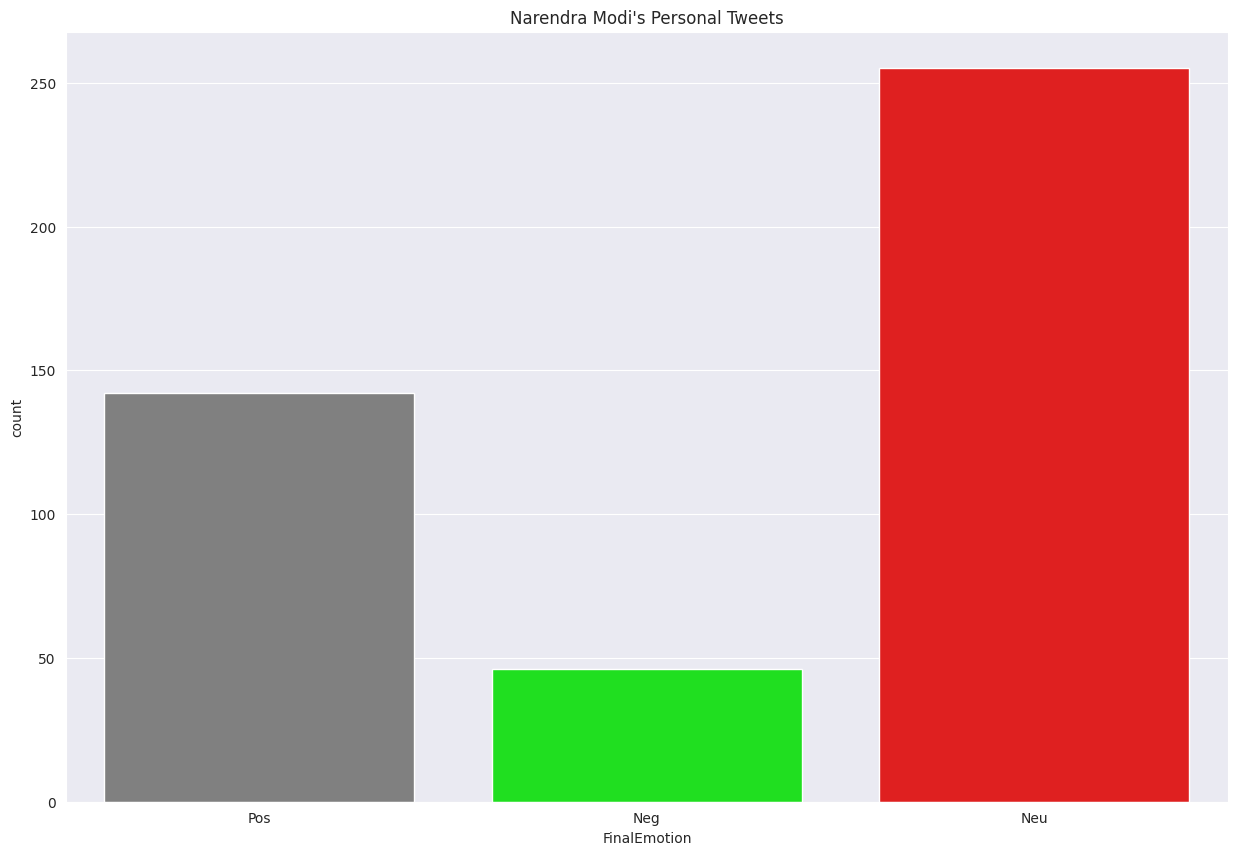

In [ ]:
# Plot counting total number of positive, negative and neutral emotions
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
ax = sns.countplot(x=modi_df['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Narendra Modi\'s Personal Tweets')
plt.show()

using textblob


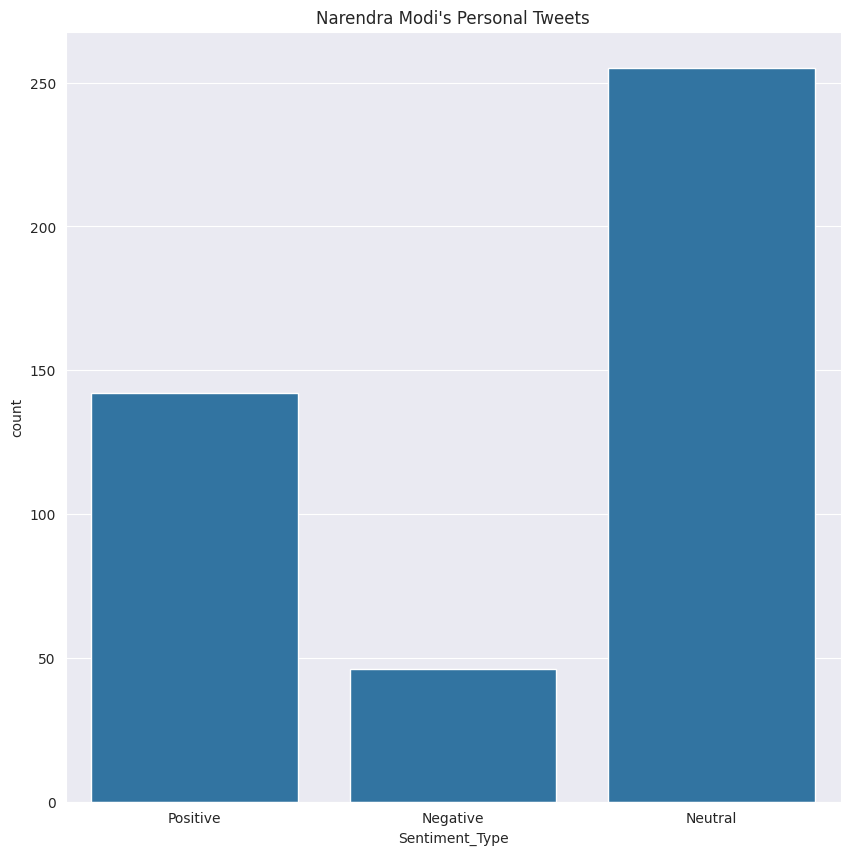

In [ ]:
# By Textblob

from textblob import TextBlob

bloblist_desc = list()

twit=modi_df['tweet'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)
ax.set_title('Narendra Modi\'s Personal Tweets')
plt.show()

sentiment for rahul gandhi


using bert


In [ ]:
rahul_df['FinalEmotion'] = rahul_df['tweet'].apply(lambda x: sentiment_score(x))
rahul_df['FinalEmotion']=rahul_df['FinalEmotion'].apply(lambda x : 'Pos' if x==5 else ('Neg' if x==1 else 'Neu'))
rahul_df

,date,tweet,User,FinalEmotion
47,"Dec 25, 2023 · 9:03 AM UTC",WATCH Congress General Secretary incharge Com...,Rahul Gandhi,Pos
59,"Dec 25, 2023 · 12:45 PM UTC",Chapa Chapa Guj Uthaega BJP MODI MODI MODI MOD...,Rahul Gandhi,Pos
62,"Dec 25, 2023 · 12:45 PM UTC",South North line originally mind game created ...,Rahul Gandhi,Neg
63,"Dec 24, 2023 · 3:59 PM UTC",This high time Congress gets active Amethi Ra...,Rahul Gandhi,Pos
68,"Dec 25, 2023 · 1:32 AM UTC",ABP News C Voters Opinion poll Punjab Lok Sabh...,Rahul Gandhi,Pos
109,"Dec 25, 2023 · 8:38 AM UTC",Congress Party lined Marathon Meetings Next da...,Rahul Gandhi,Neu
149,"Dec 25, 2023 · 12:03 PM UTC",Prove arent Hindus Hindispeaking states BRS le...,Rahul Gandhi,Pos
153,"Dec 25, 2023 · 12:01 PM UTC",INCIndia RahulGandhi Congress tie State level ...,Rahul Gandhi,Neu
167,"Dec 25, 2023 · 6:42 AM UTC",To remain power Narendra Modi lengths sacrifi...,Rahul Gandhi,Neg
169,"Dec 25, 2023 · 2:45 AM UTC",RAJAGOPALAN1951 R Rajagopalan Live 10 AM IST S...,Rahul Gandhi,Pos


<ipython-input-26-31b4b4fa05da>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




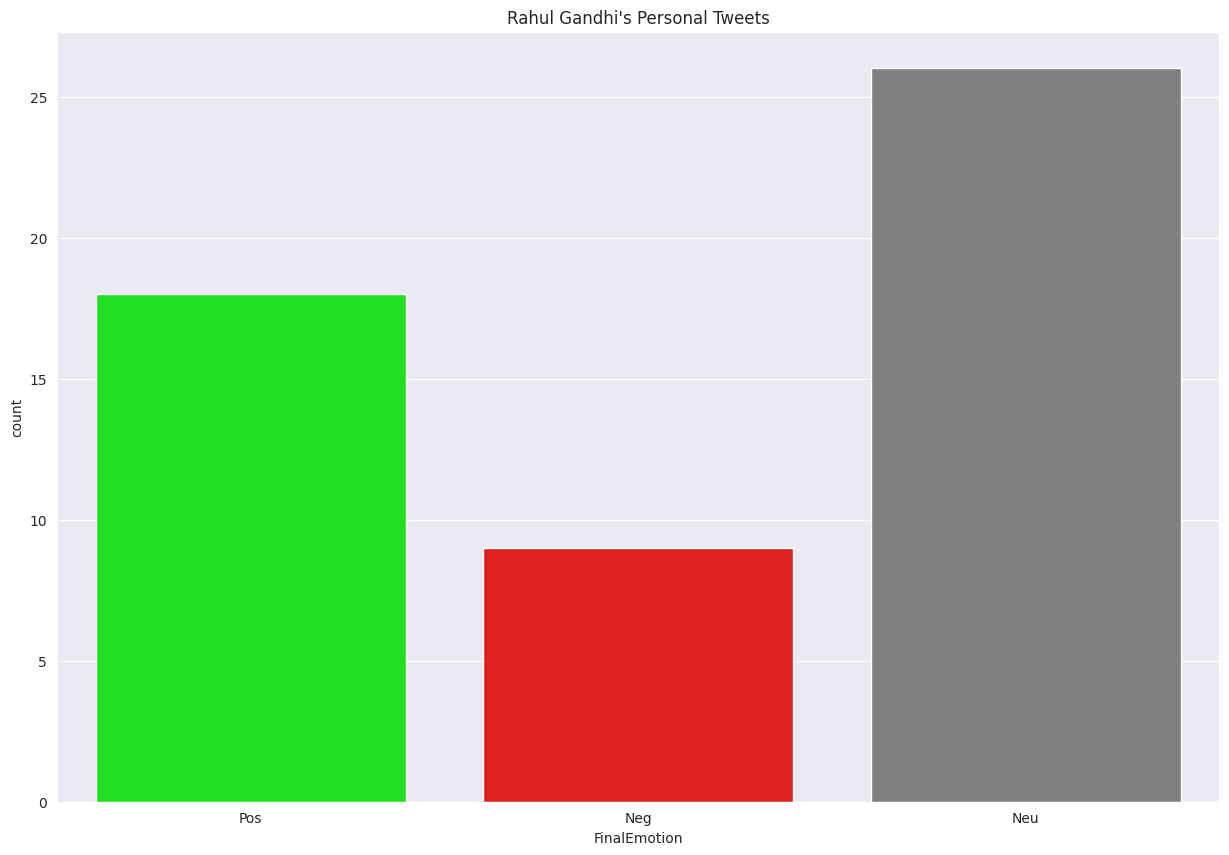

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#00FF00',"#FF0000",'#808080'])
ax.set_title('Rahul Gandhi\'s Personal Tweets')
plt.show()

using text_blob

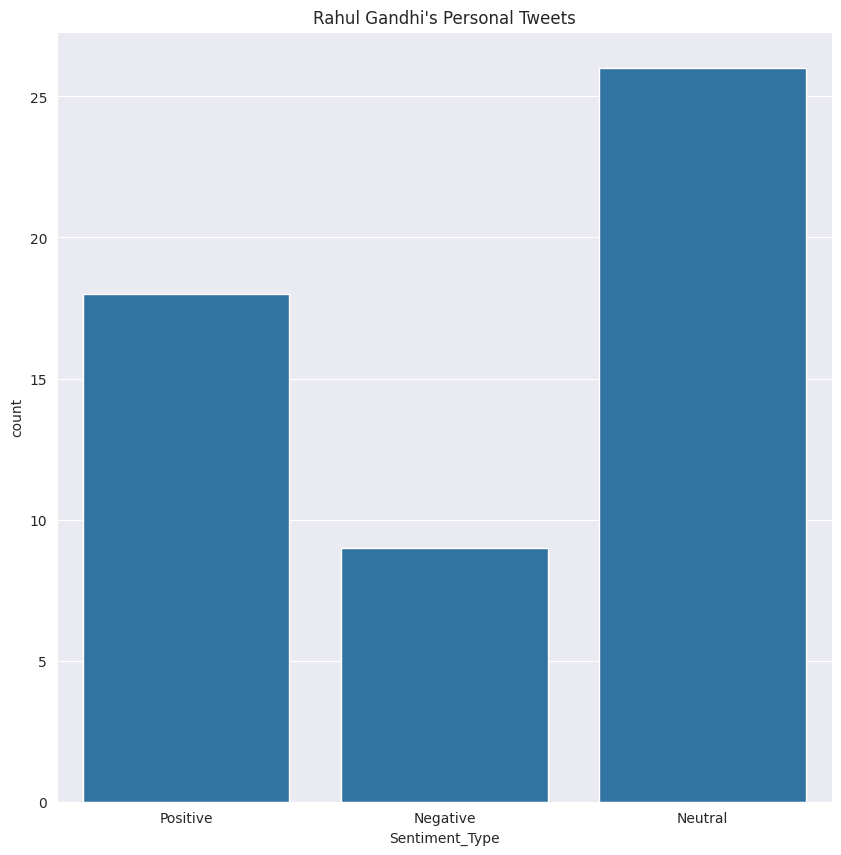

In [ ]:
bloblist_desc = list()

twit=rahul_df['tweet'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)
ax.set_title('Rahul Gandhi\'s Personal Tweets')
plt.show()

using vader


In [ ]:
from textblob import TextBlob # Import TextBlob to use its sentiment analysis functions

"""
Calculating the polarity scores with help of code snippets mentioned at the importing libraries section
""";
rahul_df['pos'] = rahul_df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity if x else 0) # Use TextBlob to get polarity scores; handle empty strings
rahul_df['neg'] = rahul_df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity if x else 0) # Use TextBlob to get subjectivity as a proxy for negative sentiment; handle empty strings
rahul_df['neu'] = rahul_df['tweet'].apply(lambda x: 1 - (TextBlob(x).sentiment.polarity + TextBlob(x).sentiment.subjectivity) if x else 1) # Calculate neutrality as 1 - (polarity + subjectivity); handle empty strings

In [ ]:
emotion=[]
# Iterate over the rows of the DataFrame using iterrows()
for index, row in rahul_df.iterrows():
    emotion.append(max(row['pos'], row['neu'], row['neg']))

rahul_df['FinalEmotion'] = emotion

for index, row in rahul_df.iterrows():
    if row['FinalEmotion'] == row['pos']:
        rahul_df.loc[index, 'FinalEmotion'] = 'positive'
    elif row['FinalEmotion'] == row['neg']:
        rahul_df.loc[index, 'FinalEmotion'] = 'negative'
    elif row['FinalEmotion'] == row['neu']:
        rahul_df.loc[index, 'FinalEmotion'] = 'neutral'

rahul_df

<ipython-input-29-fc3b3ec4b9a0>:12: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'negative' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,date,tweet,User,FinalEmotion,pos,neg,neu
47,"Dec 25, 2023 · 9:03 AM UTC",WATCH Congress General Secretary incharge Com...,Rahul Gandhi,negative,0.263889,0.586111,0.150000
59,"Dec 25, 2023 · 12:45 PM UTC",Chapa Chapa Guj Uthaega BJP MODI MODI MODI MOD...,Rahul Gandhi,negative,0.350000,0.550000,0.100000
62,"Dec 25, 2023 · 12:45 PM UTC",South North line originally mind game created ...,Rahul Gandhi,negative,-0.012500,0.575000,0.437500
63,"Dec 24, 2023 · 3:59 PM UTC",This high time Congress gets active Amethi Ra...,Rahul Gandhi,neutral,0.008889,0.405641,0.585470
68,"Dec 25, 2023 · 1:32 AM UTC",ABP News C Voters Opinion poll Punjab Lok Sabh...,Rahul Gandhi,negative,0.050000,0.950000,0.000000
109,"Dec 25, 2023 · 8:38 AM UTC",Congress Party lined Marathon Meetings Next da...,Rahul Gandhi,neutral,0.000000,0.000000,1.000000
149,"Dec 25, 2023 · 12:03 PM UTC",Prove arent Hindus Hindispeaking states BRS le...,Rahul Gandhi,negative,0.325000,0.666667,0.008333
153,"Dec 25, 2023 · 12:01 PM UTC",INCIndia RahulGandhi Congress tie State level ...,Rahul Gandhi,neutral,0.000000,0.000000,1.000000
167,"Dec 25, 2023 · 6:42 AM UTC",To remain power Narendra Modi lengths sacrifi...,Rahul Gandhi,neutral,-0.010101,0.401515,0.608586
169,"Dec 25, 2023 · 2:45 AM UTC",RAJAGOPALAN1951 R Rajagopalan Live 10 AM IST S...,Rahul Gandhi,negative,0.412121,0.633333,-0.045455


In [ ]:
rahul_df['FinalEmotion'].value_counts()

,count
FinalEmotion,
neutral,34
negative,18
positive,1


<ipython-input-31-9a6d101aaad0>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




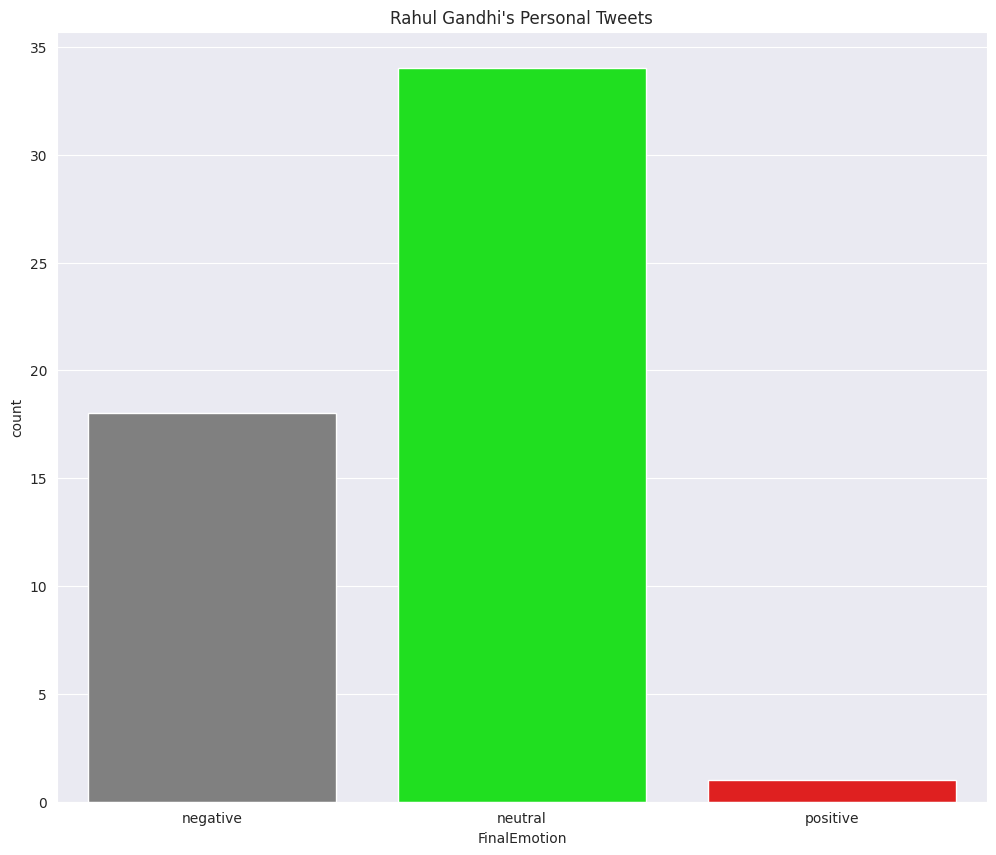

In [ ]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x=rahul_df['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Rahul Gandhi\'s Personal Tweets')
plt.show()

COMPARATIVE STUDY OF MODI'S VS RAHUL'S TWEET

COMBINING BOTH DATAFRAME

In [ ]:
modi_df['User'] = 'Narendra Modi'
rahul_df['User'] = 'Rahul Gandhi'
# Combining Both The Dataframes

dfNR=pd.concat([modi_df,rahul_df], axis=0)
dfNR=dfNR.reset_index(drop=True)
dfNR

,date,tweet,pos,neg,neu,FinalEmotion,User
0,"Dec 25, 2023 · 12:05 PM UTC",South India 2024 Loksabha Opinion Poll 132 sea...,0.800000,0.400000,-0.200000,Pos,Narendra Modi
1,"Dec 25, 2023 · 1:00 PM UTC",Veteran actor Nana Patekar says There alternat...,0.311111,0.569444,0.119444,Pos,Narendra Modi
2,"Dec 25, 2023 · 12:21 PM UTC",South India BJP 2019 Loksabha Karnataka 25 Tel...,-0.300000,0.535417,0.764583,Neg,Narendra Modi
3,"Dec 25, 2023 · 8:19 AM UTC",Total number times MMS won lok sabha seat ZER...,0.025000,0.625000,0.350000,Pos,Narendra Modi
4,"Dec 25, 2023 · 10:00 AM UTC",Let’s deliver Tenkasi Lok Sabha seat strengthe...,0.000000,0.000000,1.000000,Neu,Narendra Modi
...,...,...,...,...,...,...,...
491,"Dec 24, 2023 · 4:24 PM UTC",ABP news kitty Ruling Partythat targets Rahul ...,-0.500000,1.000000,0.500000,negative,Rahul Gandhi
492,"Dec 22, 2023 · 6:11 AM UTC",It year 1998 BJP single largest party NDA stro...,-0.111290,0.413071,0.698219,neutral,Rahul Gandhi
493,"Dec 25, 2023 · 1:35 AM UTC",Kharge adopted lameduck approach Rajasthan ref...,-0.100000,0.461111,0.638889,neutral,Rahul Gandhi
494,"Dec 25, 2023 · 3:01 AM UTC",Sabseh kathin yatra INDI ALLIANCE meh Akhilesh...,0.000000,0.000000,1.000000,neutral,Rahul Gandhi


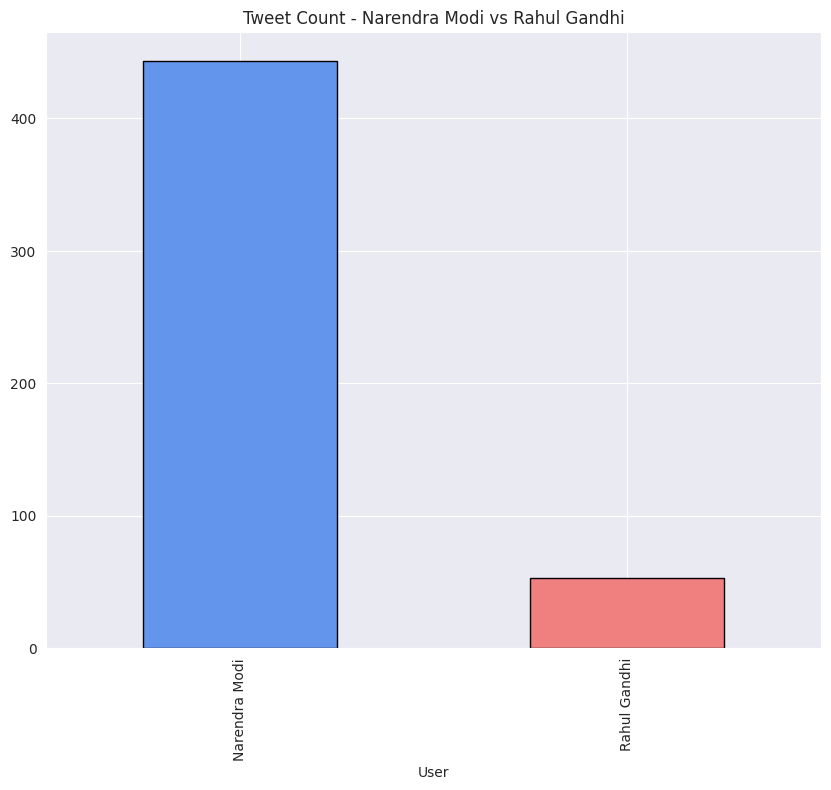

In [ ]:
# Add a 'User' column to both modi_df and rahul_df before concatenating
modi_df['User'] = 'Narendra Modi'
rahul_df['User'] = 'Rahul Gandhi'

# Concatenate the dataframes
combined_df = pd.concat([modi_df, rahul_df], ignore_index=True)

# Now, the groupby should work
plt.figure(figsize=(10,8))
combined_df.groupby(['User']).count().tweet.plot(kind='bar',title='Tweet Count - Narendra Modi vs Rahul Gandhi',edgecolor='black',color=['cornflowerblue','lightcoral'])
plt.show()

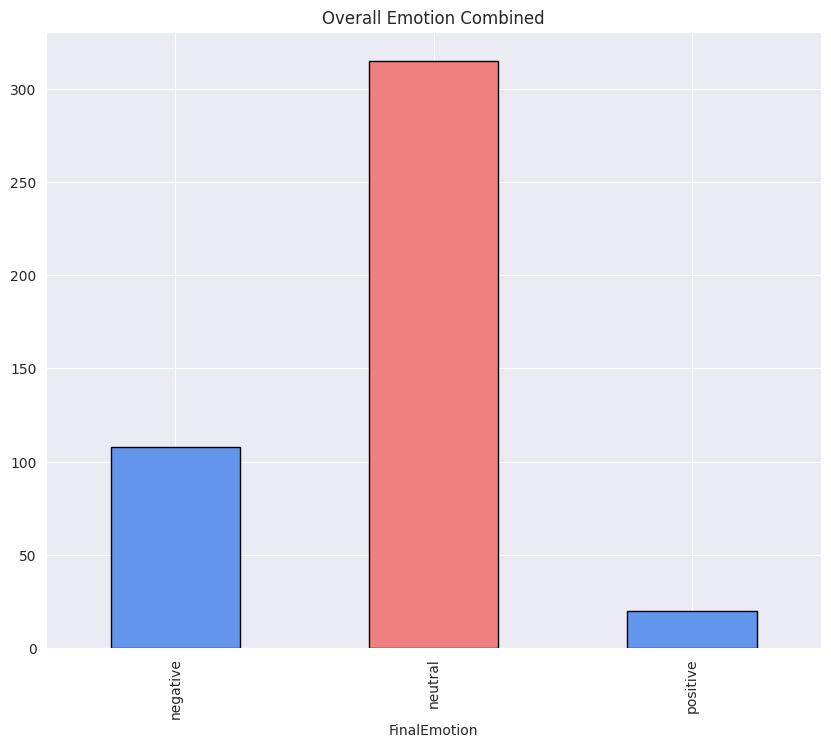

In [ ]:
plt.figure(figsize=(10,8))
# Plot the bar chart for overall emotion
combined_df.groupby(['FinalEmotion']).count().tweet.plot(kind='bar',title='Overall Emotion Combined',edgecolor='black',color=['cornflowerblue','lightcoral'])
plt.show()

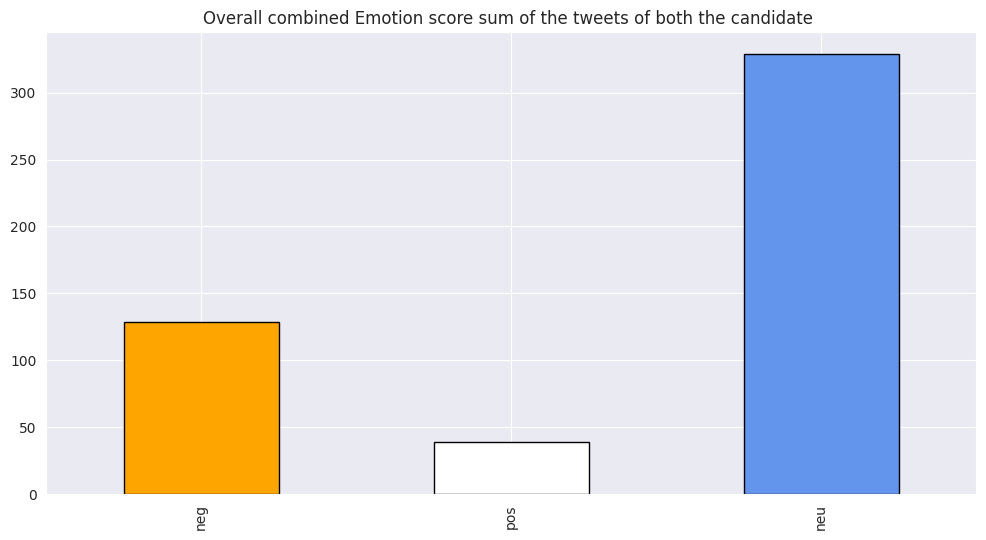

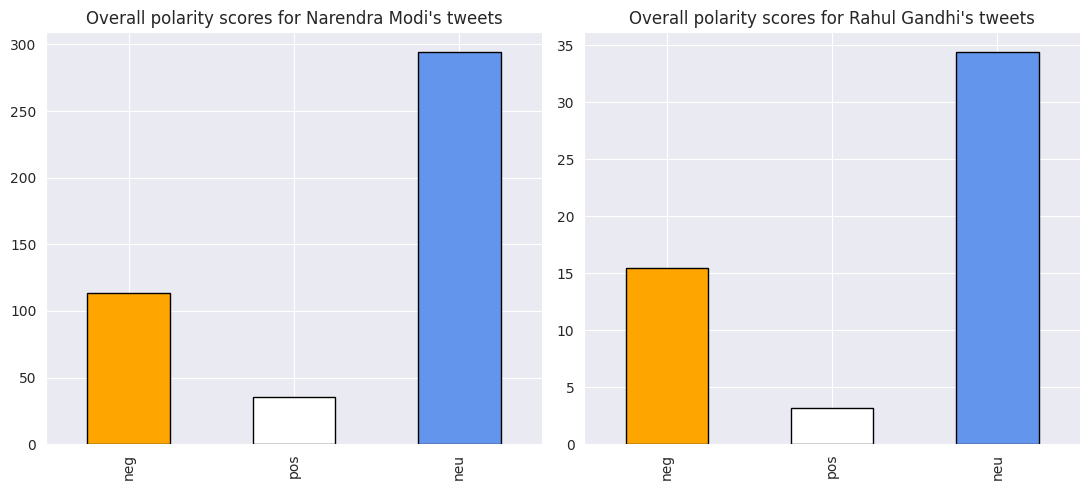

In [ ]:
plt.figure(figsize=(12,6))

combined_df[['neg','pos','neu']].sum().plot(kind='bar',title='Overall combined Emotion score sum of the tweets of both the candidate ',edgecolor='black',color=['orange','white','cornflowerblue'])
plt.show()

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
modi_df[['neg','pos','neu']].sum().plot(kind='bar',title="Overall polarity scores for Narendra Modi's tweets",edgecolor='black',color=['orange','white','cornflowerblue'])

plt.subplot(1,2,2)
# Check if 'neg', 'pos', 'neu' are the correct column names in rahul_df
# If not, replace them with the actual column names
# For example, if the columns are named 'negative', 'positive', 'neutral', use:
# rahul_df[['negative', 'positive', 'neutral']].sum().plot(...)
rahul_df[['neg','pos','neu']].sum().plot(kind='bar',title="Overall polarity scores for Rahul Gandhi's tweets",edgecolor='black',color=['orange','white','cornflowerblue'])


plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report

# Sample DataFrame
data = {
    "Tweet": [
        "Modi is doing great!",
        "Rahul's policies are bad.",
        "Modi's speech was okay."
    ],
    "Candidate": ["Modi", "Rahul Gandhi", "Modi"],
    "Actual Sentiment": ["Positive", "Negative", "Neutral"]
}
df = pd.DataFrame(data)

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Predict sentiment using VADER
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply VADER prediction
df["Predicted Sentiment"] = df["Tweet"].apply(vader_sentiment)

# Separate Modi and Rahul Gandhi tweets (optional)
modi_df = df[df["Candidate"] == "Modi"]
rahul_df = df[df["Candidate"] == "Rahul Gandhi"]

# Calculate F1-score for each candidate
print("Modi Sentiment Analysis:")
print(classification_report(modi_df["Actual Sentiment"], modi_df["Predicted Sentiment"]))

print("Rahul Gandhi Sentiment Analysis:")
print(classification_report(rahul_df["Actual Sentiment"], rahul_df["Predicted Sentiment"]))


ModuleNotFoundError: No module named 'vaderSentiment'